In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
%tensorflow_version 1.6
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.6`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
dataset = pd.read_csv('CRM.csv',index_col="Date",parse_dates=True)

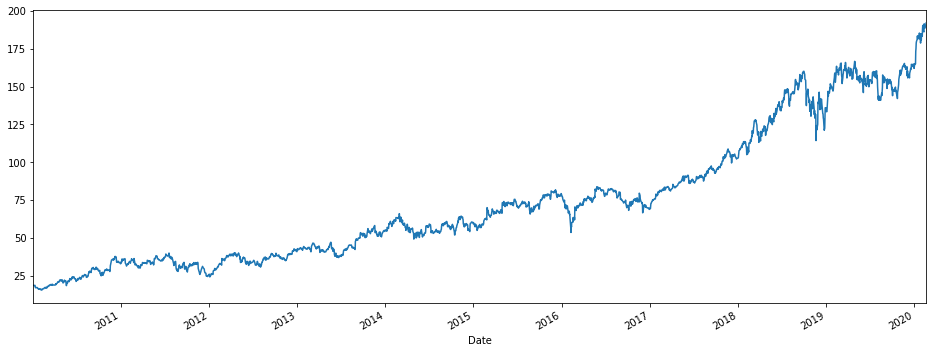

In [0]:
dataset['Open'].plot(figsize=(16,6))

In [0]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,18.652500,18.882500,18.547501,18.705000,18.705000,7906000
2010-01-05,18.612499,18.750000,18.200001,18.625000,18.625000,7942400
2010-01-06,18.687500,18.750000,18.495001,18.592501,18.592501,5122400
2010-01-07,18.629999,18.737499,18.385000,18.510000,18.510000,4840000
2010-01-08,18.517500,18.587500,18.315001,18.537500,18.537500,5510400
...,...,...,...,...,...,...
2020-02-12,189.710007,190.520004,186.770004,189.460007,189.460007,4535400
2020-02-13,188.500000,191.050003,188.419998,188.639999,188.639999,3132100
2020-02-14,189.350006,190.250000,188.100006,189.949997,189.949997,3599400


In [0]:
dataset["Close"] = dataset["Close"].astype(float)
dataset["Volume"] = dataset["Volume"].astype(float)
dataset["Open"] = dataset["Open"].astype(float)
dataset["High"] = dataset["High"].astype(float)
dataset["Low"] = dataset["Low"].astype(float)

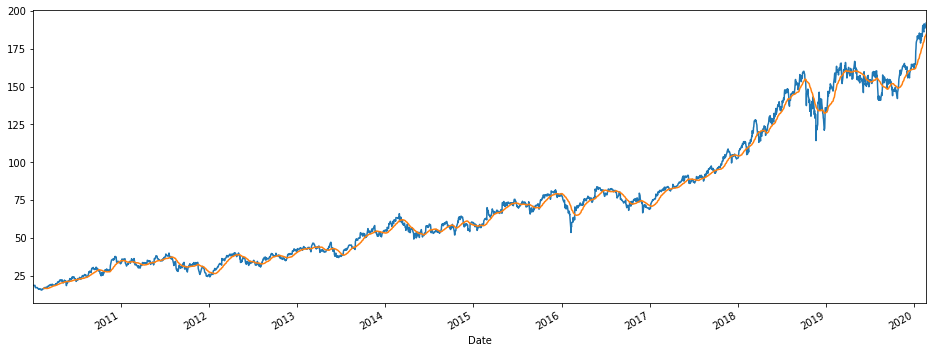

In [0]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

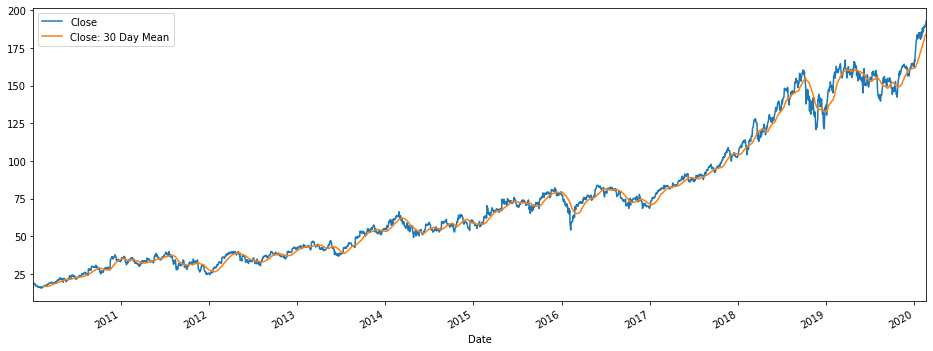

In [0]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

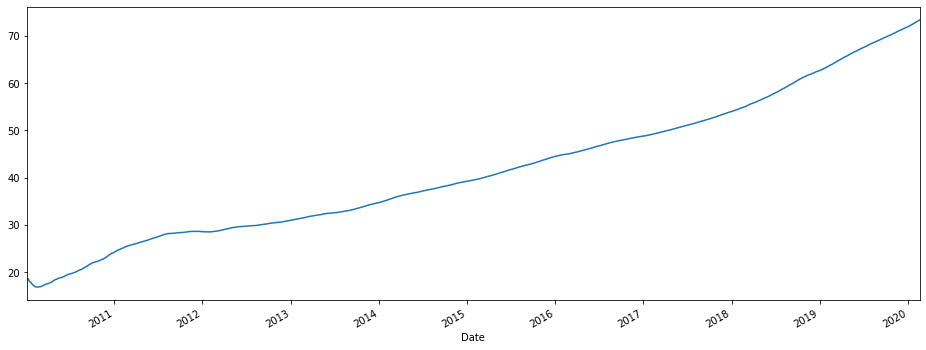

In [0]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [0]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [0]:
# Feature Scalin
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
no_epoch = 20

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
x_all = []
y_all = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    x_all.append(training_set_scaled[i-60:i, 0])
    y_all.append(training_set_scaled[i, 0])
X_train, y_train, x_all, y_all = np.array(X_train), np.array(y_train), np.array(x_all), np.array(y_all)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_all = np.reshape(x_all, (x_all.shape[0], x_all.shape[1], 1))

<h2>Train Data = 0.9
Test Data = 0.1

In [0]:
train_split = 0.9
train_num = int(train_split*len(X_train))
X_train, X_test, y_train, y_test = X_train[:train_num], X_train[train_num:], y_train[:train_num], y_train[train_num:]

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = no_epoch, batch_size = 32, validation_data=(X_test, y_test))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1078 samples, validate on 120 samples
Epoch 1/20





1078/1078 [==============================] - 16s 15ms/step - loss: 0.0030 - val_loss: 5.8009e-04
Epoch 2/20
1078/1078 [==============================] - 13s 12ms/step - loss: 4.4616e-04 - val_loss: 3.9035e-04
Epoch 3/20
1078/1078 [==============================] - 12s 11ms/step - loss: 3.6162e-04 - val_loss: 5.3415e-04
Epoch 4/20
1078/1078 [==============================] - 12s 11ms/step - loss: 3.2082e-04 - val_loss: 3.8333e-04
Epoch 5/20
1078/1078 [==============================] - 13s 12ms/step - loss: 3.3218e-04 - val_loss: 3.5088e-04
Epoch 6/20
1078/1078 [==============================] - 12s 11ms/step - loss: 3.1805e-04 - val_loss: 5.9261e-04
Epoch 7/20
1078/1078 [==============================] - 12s 12m

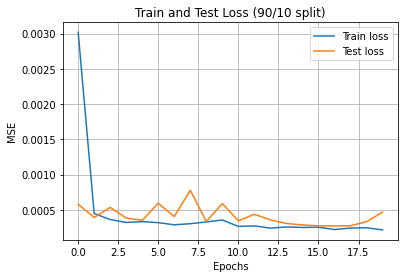

In [0]:
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Test loss")
plt.xlabel('Epochs')
plt.ylabel('MSE')
fig_name = "Train and Test Loss (90/10 split)"
plt.title(fig_name)
plt.legend()
plt.grid()
# graph_name = "samples_"+str(train_num)+".png"
# plt.savefig(graph_name)
# plt.close()

In [0]:
predicted_stock_price = regressor.predict(X_test)
real_stock_prices = y_test.tolist()

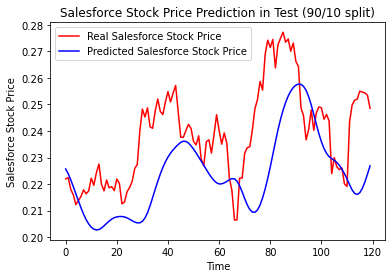

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Test (90/10 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

In [0]:
predicted_stock_price = regressor.predict(x_all)
real_stock_prices = y_all.tolist()

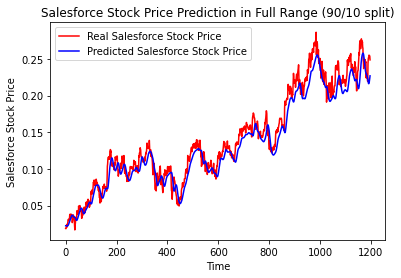

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Full Range (90/10 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

<h2>Train Data = 0.75
Test Data = 0.25

In [0]:
train_split = 0.75
train_num = int(train_split*len(X_train))
X_train, X_test, y_train, y_test = X_train[:train_num], X_train[train_num:], y_train[:train_num], y_train[train_num:]

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = no_epoch, batch_size = 32, validation_data=(X_test, y_test))

Train on 808 samples, validate on 270 samples
Epoch 1/20
808/808 [==============================] - 13s 16ms/step - loss: 0.0022 - val_loss: 0.0074
Epoch 2/20
808/808 [==============================] - 10s 12ms/step - loss: 5.7202e-04 - val_loss: 3.4636e-04
Epoch 3/20
808/808 [==============================] - 11s 13ms/step - loss: 2.9203e-04 - val_loss: 2.9455e-04
Epoch 4/20
808/808 [==============================] - 11s 13ms/step - loss: 2.3992e-04 - val_loss: 7.1916e-04
Epoch 5/20
808/808 [==============================] - 10s 13ms/step - loss: 2.8987e-04 - val_loss: 6.5512e-04
Epoch 6/20
808/808 [==============================] - 11s 13ms/step - loss: 2.4467e-04 - val_loss: 9.2823e-04
Epoch 7/20
808/808 [==============================] - 10s 13ms/step - loss: 2.4820e-04 - val_loss: 4.1721e-04
Epoch 8/20
808/808 [==============================] - 10s 13ms/step - loss: 1.8950e-04 - val_loss: 5.6381e-04
Epoch 9/20
808/808 [==============================] - 10s 13ms/step - loss: 1.8583

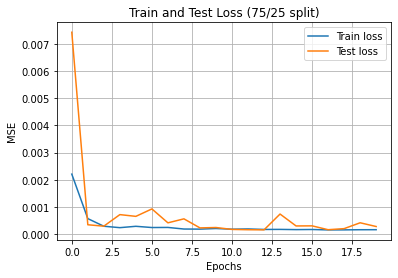

In [0]:
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Test loss")
plt.xlabel('Epochs')
plt.ylabel('MSE')
fig_name = "Train and Test Loss (75/25 split)"
plt.title(fig_name)
plt.legend()
plt.grid()
# graph_name = "samples_"+str(train_num)+".png"
# plt.savefig(graph_name)
# plt.close()

In [0]:
predicted_stock_price = regressor.predict(X_test)
real_stock_prices = y_test.tolist()

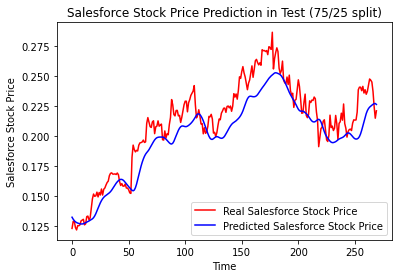

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Test (75/25 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

In [0]:
predicted_stock_price = regressor.predict(x_all)
real_stock_prices = y_all.tolist()

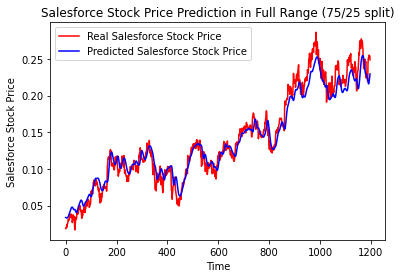

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Full Range (75/25 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

<h2>Train Data = 0.5
Test Data = 0.5

In [0]:
train_split = 0.5
train_num = int(train_split*len(X_train))
X_train, X_test, y_train, y_test = X_train[:train_num], X_train[train_num:], y_train[:train_num], y_train[train_num:]

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = no_epoch, batch_size = 32, validation_data=(X_test, y_test))

Train on 404 samples, validate on 404 samples
Epoch 1/20
404/404 [==============================] - 10s 24ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 2/20
404/404 [==============================] - 6s 16ms/step - loss: 6.0037e-04 - val_loss: 0.0013
Epoch 3/20
404/404 [==============================] - 6s 15ms/step - loss: 3.5408e-04 - val_loss: 3.7616e-04
Epoch 4/20
404/404 [==============================] - 6s 16ms/step - loss: 2.4232e-04 - val_loss: 2.0692e-04
Epoch 5/20
404/404 [==============================] - 6s 15ms/step - loss: 2.5072e-04 - val_loss: 2.2700e-04
Epoch 6/20
404/404 [==============================] - 6s 15ms/step - loss: 2.3087e-04 - val_loss: 2.0753e-04
Epoch 7/20
404/404 [==============================] - 6s 15ms/step - loss: 2.1261e-04 - val_loss: 1.8737e-04
Epoch 8/20
404/404 [==============================] - 6s 15ms/step - loss: 1.8707e-04 - val_loss: 1.9151e-04
Epoch 9/20
404/404 [==============================] - 6s 15ms/step - loss: 2.1031e-04 - val_l

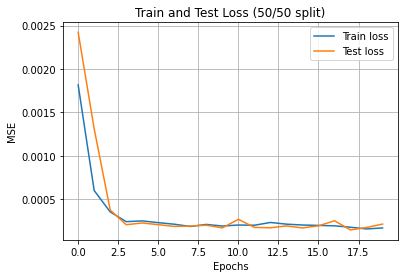

In [0]:
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Test loss")
plt.xlabel('Epochs')
plt.ylabel('MSE')
fig_name = "Train and Test Loss (50/50 split)"
plt.title(fig_name)
plt.legend()
plt.grid()
# graph_name = "samples_"+str(train_num)+".png"
# plt.savefig(graph_name)
# plt.close()

In [0]:
predicted_stock_price = regressor.predict(X_test)
real_stock_prices = y_test.tolist()

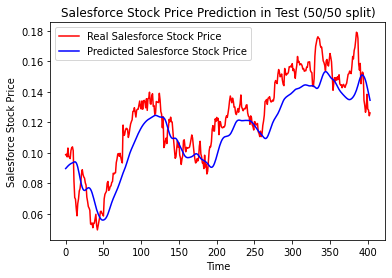

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Test (50/50 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

In [0]:
predicted_stock_price = regressor.predict(x_all)
real_stock_prices = y_all.tolist()

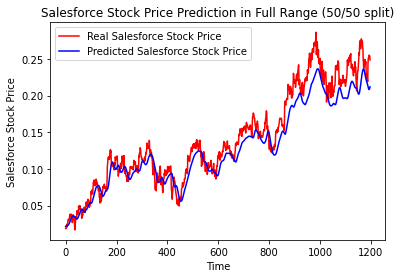

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Full Range (50/50 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

<h2>Train Data = 0.3
Test Data = 0.7

In [0]:
train_split = 0.3
train_num = int(train_split*len(X_train))
X_train, X_test, y_train, y_test = X_train[:train_num], X_train[train_num:], y_train[:train_num], y_train[train_num:]

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = no_epoch, batch_size = 32, validation_data=(X_test, y_test))

Train on 36 samples, validate on 85 samples
Epoch 1/20
36/36 [==============================] - 6s 166ms/step - loss: 8.6415e-04 - val_loss: 2.8431e-04
Epoch 2/20
36/36 [==============================] - 1s 33ms/step - loss: 2.1346e-04 - val_loss: 3.4414e-04
Epoch 3/20
36/36 [==============================] - 1s 31ms/step - loss: 1.0626e-04 - val_loss: 9.9619e-04
Epoch 4/20
36/36 [==============================] - 1s 30ms/step - loss: 1.0314e-04 - val_loss: 0.0013
Epoch 5/20
36/36 [==============================] - 1s 32ms/step - loss: 1.5982e-04 - val_loss: 8.9923e-04
Epoch 6/20
36/36 [==============================] - 1s 30ms/step - loss: 5.6646e-05 - val_loss: 5.5643e-04
Epoch 7/20
36/36 [==============================] - 1s 31ms/step - loss: 7.7439e-05 - val_loss: 4.5581e-04
Epoch 8/20
36/36 [==============================] - 1s 33ms/step - loss: 8.0158e-05 - val_loss: 5.1624e-04
Epoch 9/20
36/36 [==============================] - 1s 31ms/step - loss: 8.1362e-05 - val_loss: 6.9659e

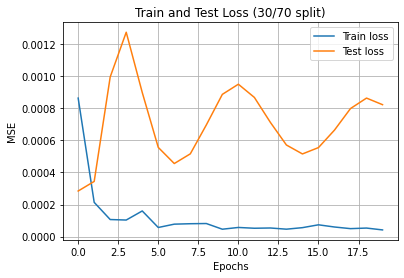

In [0]:
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Test loss")
plt.xlabel('Epochs')
plt.ylabel('MSE')
fig_name = "Train and Test Loss (30/70 split)"
plt.title(fig_name)
plt.legend()
plt.grid()
# graph_name = "samples_"+str(train_num)+".png"
# plt.savefig(graph_name)
# plt.close()

In [0]:
predicted_stock_price = regressor.predict(X_test)
real_stock_prices = y_test.tolist()

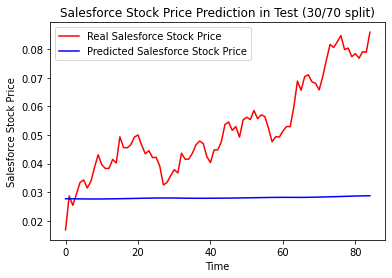

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Test (30/70 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()

In [0]:
predicted_stock_price = regressor.predict(x_all)
real_stock_prices = y_all.tolist()

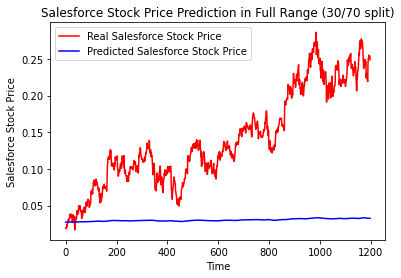

In [0]:
# Visualising the results
plt.plot(real_stock_prices, color = 'red', label = 'Real Salesforce Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Salesforce Stock Price')
plt.title('Salesforce Stock Price Prediction in Full Range (30/70 split)')
plt.xlabel('Time')
plt.ylabel('Salesforce Stock Price')
plt.legend()
plt.show()